## **Home Loan Project**

The home loan industry plays a pivotal role in the financial services sector, enabling individuals and families to secure funding for property purchases. The Home Loan dataset contains information on potential applicants, such as income, employment status, credit history and property details.


This aim of this project is to understand the relationships in the data set through data cleaning, visualization, and statistical analysis. The investigation will influence our decisions on loan approvals and help with risk assessment.

### **Data Collection and Preparation**

In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data
data_url = "https://raw.githubusercontent.com/ek-chris/Practice_datasets/refs/heads/main/home_loan_train.csv"

home_loan = pd.read_csv(data_url)

home_loan.head()

df = home_loan.copy()

df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Data Ingestion**

In [ ]:
loan_data = pd.DataFrame(df)
loan_data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Data Inspection**

In [ ]:
# Columns/Features of our Data
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
# Check the number of columns and rows
loan_data.shape

(614, 13)

In [ ]:
# Check for missing data
loan_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### **Handling Missing Values**

In [ ]:
# Seeing as we have a large number of missing data in credit history, self employed and loan amount columns, let us gauge the percentage of missingness in the whole data

round((loan_data.isna().sum() / len(loan_data)) * 100, 2)

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

**Since we have > 5% missingness in self_employed and credit history, we need to check if they are important columns in pre-processing our data. Seeing as employability and credit history are important factors in predicting if loans will be repaid, we need to handle it without dropping those columns**

In [ ]:
# We can fill missing values using imputation based on our measure of center (mean, median and mode)

# Self_employed is Categorical/Classical, we can use Mode

loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)

loan_data.isna().sum()


C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_6940\3931744312.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# For Credit History, since it is represented in Binary, we can also use mode.

loan_data['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [ ]:
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0])

loan_data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# For loan amount, since it is numerical, we need to check for outliers first to know if we can use the mean or median to fill the data
def get_outliers(dataset):
  Q1 = dataset.quantile(0.25)

  Q3 = dataset.quantile(0.75)

  IQR = Q3 - Q1

  lower_bound = Q1 - (1.5 * IQR)
  higher_bound = Q3 + (1.5 * IQR)

  outliers = loan_data[(dataset < lower_bound) | (dataset > higher_bound)]

  return outliers

get_outliers(loan_data['LoanAmount'])
len(get_outliers(loan_data['LoanAmount']))


39

<Axes: ylabel='LoanAmount'>

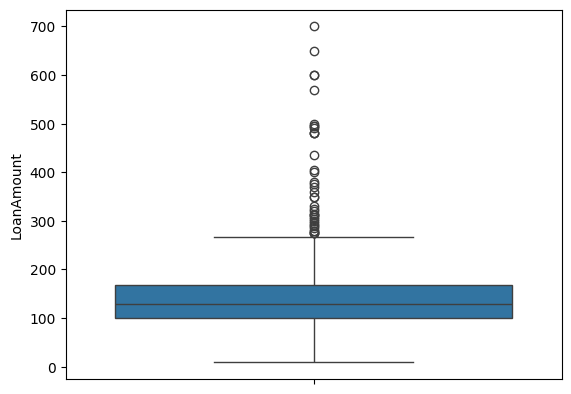

In [ ]:
# Using visual representation
sns.boxplot(loan_data['LoanAmount'])

In [ ]:
# Seeing as we have a lot of outliers in the LoanAmount column, we are going to use the median to replace the LoanAmount with the median
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(), inplace=True)
loan_data.isna().sum()

C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_6940\3308695283.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(), inplace=True)


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Since Gender is boolean/binary, we can also use mode to fill missing data
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)
loan_data.isna().sum()

C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_6940\3141190060.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)


Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
get_outliers(loan_data['Loan_Amount_Term'])
len(get_outliers(loan_data['Loan_Amount_Term']))

88

<Axes: ylabel='Loan_Amount_Term'>

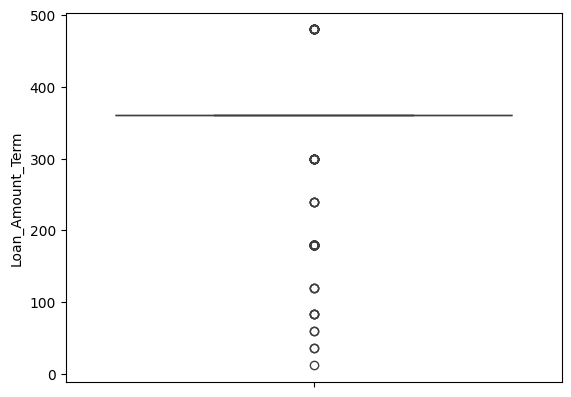

In [ ]:
sns.boxplot(loan_data['Loan_Amount_Term'])

In [ ]:
# Seeing as we have a lot of outliers in the LoanAmount column, we are going to use the median to replace the LoanAmount with the median
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].median(), inplace=True)

loan_data.isna().sum()

C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_6940\3950021936.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].median(), inplace=True)


Loan_ID               0
Gender                0
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)
loan_data.isna().sum()

C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_6940\1465687612.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)


Loan_ID               0
Gender                0
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan_data['Married'].fillna(loan_data['Married'].mode()[0])
loan_data.isna().sum()

Loan_ID               0
Gender                0
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Checking for duplicates
loan_data.duplicated().sum()

np.int64(0)

In [ ]:
# Checking for data type inconsistencies...
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
# Convert ApplicantIncome from integer to float
loan_data['ApplicantIncome'] = loan_data['ApplicantIncome'].astype('float64')
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## **Exploratory Data Analysis (EDA)**

**Let'do some `Data Transformation/Feature Engineering`**

**Financial Variables Added/Changed**

The Credit History was initially a numerical variable although it falls into the categorical(binary) variable category. Decided to transform it to a categorical variable by replacing the binary (1 or 0) with Good or Bad as shown below

In [ ]:
# For credit history, let us try changing it to a categorical data
loan_data['Credit_History'].replace({1: 'Good', 0: 'Bad'}, inplace=True)

loan_data['Credit_History'].tail()

C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_6940\692169863.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['Credit_History'].replace({1: 'Good', 0: 'Bad'}, inplace=True)


609    Good
610    Good
611    Good
612    Good
613     Bad
Name: Credit_History, dtype: object

We would also be including a Total_Income column which I think is crucial. It is the sum of the ApplicantIncome and CoApplicantIncome, that would give us the Total Income of the applicant, rather than calculating them individually.

In [ ]:
# Let us have a Total_Income column that would be sum of ApplicantIncome and CoapplicantIncome

loan_data['Total_Income'] = loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome']
loan_data['Total_Income'].head()

0    5849.0
1    6091.0
2    3000.0
3    4941.0
4    6000.0
Name: Total_Income, dtype: float64

**Statistical Summary**

In [ ]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

In [ ]:
loan_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
Total_Income         float64
dtype: object

In [ ]:
loan_data = loan_data.set_index('Loan_ID')
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
Loan_ID,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849.0,0.0,128.0,360.0,Good,Urban,Y,5849.0
LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,Good,Rural,N,6091.0
LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,Good,Urban,Y,3000.0
LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,Good,Urban,Y,4941.0
LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,Good,Urban,Y,6000.0


In [ ]:
loan_data.describe().round(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total_Income
count,614.00,614.00,614.00,614.00,614.00
mean,5403.46,1621.25,145.75,342.41,7024.71
std,6109.04,2926.25,84.11,64.43,6458.66
min,150.00,0.00,9.00,12.00,1442.00
25%,2877.50,0.00,100.25,360.00,4166.00
50%,3812.50,1188.50,128.00,360.00,5416.50
75%,5795.00,2297.25,164.75,360.00,7521.75
max,81000.00,41667.00,700.00,480.00,81000.00


In [ ]:
# Select Numerical Columns
num_features = loan_data.select_dtypes(include=['float64', 'int64']).columns
num_features

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Total_Income'],
      dtype='object')

### **Univariate analysis**

Analysing the numerical columns one at a time

In [ ]:
def univariate_numerical_eda(df, column):
    """
    Performs univariate EDA on a single numerical column.
    Displays summary statistics, skewness, kurtosis, histogram, KDE, and boxplot.
    """
    print(f" Feature: {column}")
    print("="*40)
    print(df[column].describe().to_frame())
    print(f"\nSkewness: {df[column].skew():.3f}")
    print(f"Kurtosis: {df[column].kurt():.3f}")

    plt.figure(figsize=(12,4))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, bins=30, color='teal')
    plt.title(f'\n Distribution of {column}', fontsize=13)
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color='teal')
    plt.title(f'\n Boxplot of {column}', fontsize=13)

    plt.tight_layout()
    plt.show()

    # Optional note on transformation
    if abs(df[column].skew()) > 1:
        print(f"\n {column} is highly skewed. Consider log or Box-Cox transformation.")
    elif abs(df[column].skew()) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric.")


 Feature: ApplicantIncome
       ApplicantIncome
count       614.000000
mean       5403.459283
std        6109.041673
min         150.000000
25%        2877.500000
50%        3812.500000
75%        5795.000000
max       81000.000000

Skewness: 6.540
Kurtosis: 60.541


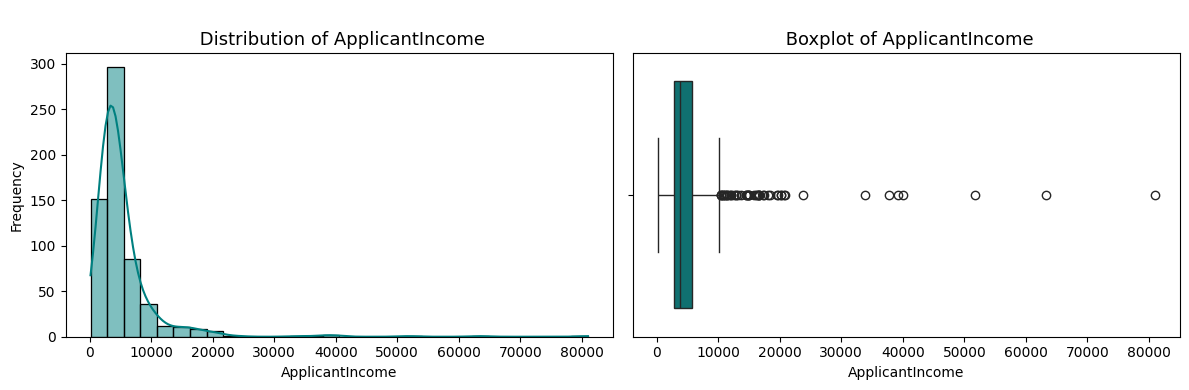


 ApplicantIncome is highly skewed. Consider log or Box-Cox transformation.
 Feature: CoapplicantIncome
       CoapplicantIncome
count         614.000000
mean         1621.245798
std          2926.248369
min             0.000000
25%             0.000000
50%          1188.500000
75%          2297.250000
max         41667.000000

Skewness: 7.492
Kurtosis: 84.956


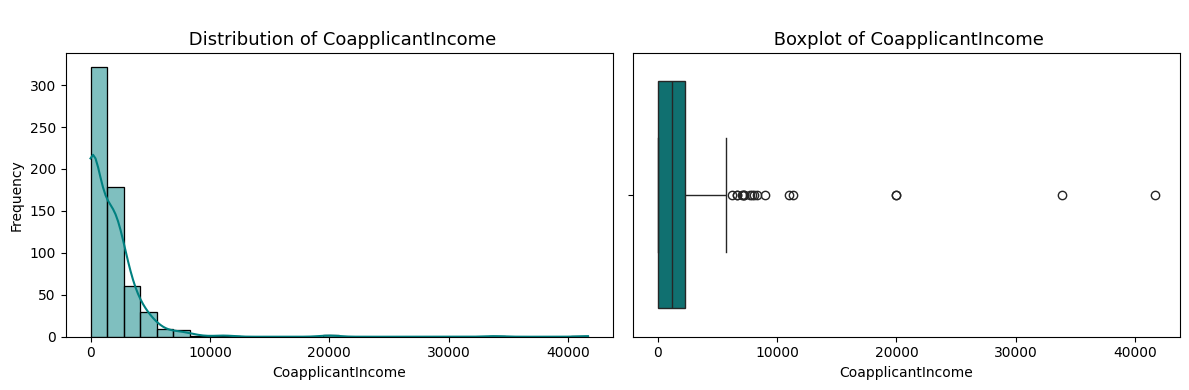


 CoapplicantIncome is highly skewed. Consider log or Box-Cox transformation.
 Feature: LoanAmount
       LoanAmount
count  614.000000
mean   145.752443
std     84.107233
min      9.000000
25%    100.250000
50%    128.000000
75%    164.750000
max    700.000000

Skewness: 2.743
Kurtosis: 10.937


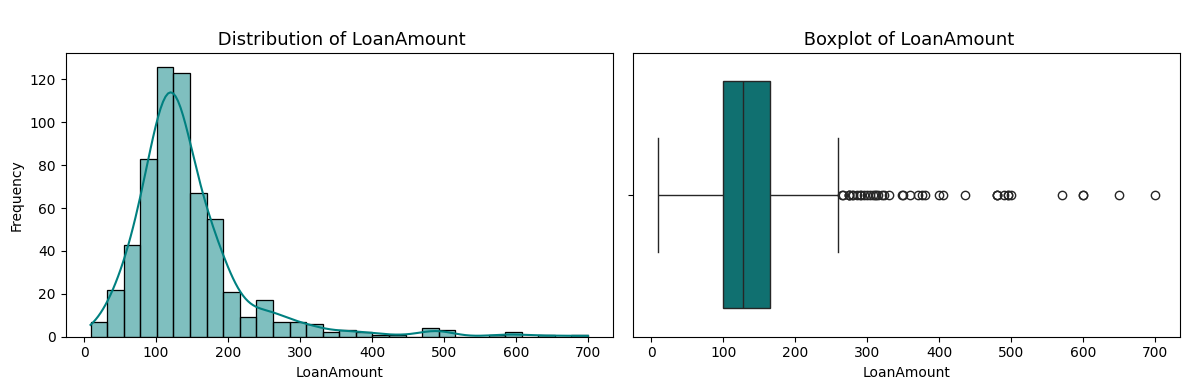


 LoanAmount is highly skewed. Consider log or Box-Cox transformation.
 Feature: Loan_Amount_Term
       Loan_Amount_Term
count        614.000000
mean         342.410423
std           64.428629
min           12.000000
25%          360.000000
50%          360.000000
75%          360.000000
max          480.000000

Skewness: -2.402
Kurtosis: 6.925


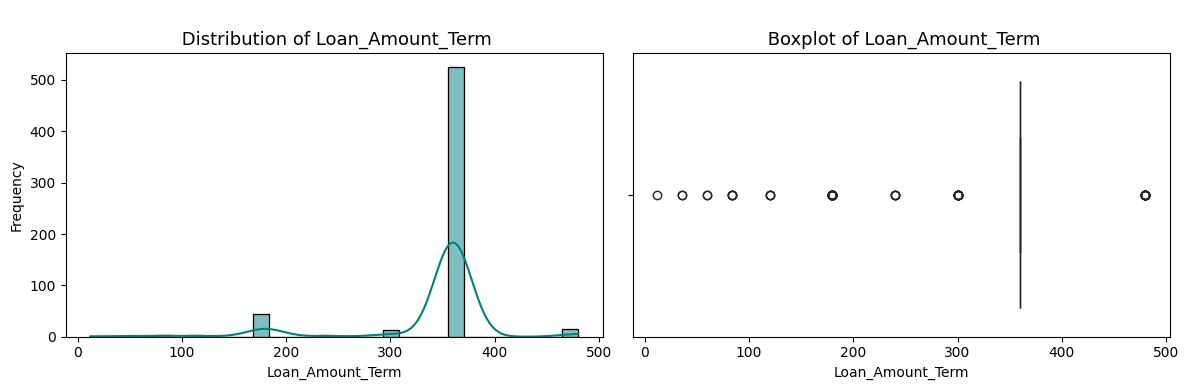


 Loan_Amount_Term is highly skewed. Consider log or Box-Cox transformation.


In [ ]:
for col in num_features:
  if col != 'Total_Income':
    univariate_numerical_eda(df, col)

 Feature: Total_Income
       Total_Income
count    614.000000
mean    7024.705081
std     6458.663872
min     1442.000000
25%     4166.000000
50%     5416.500000
75%     7521.750000
max    81000.000000

Skewness: 5.633
Kurtosis: 45.784


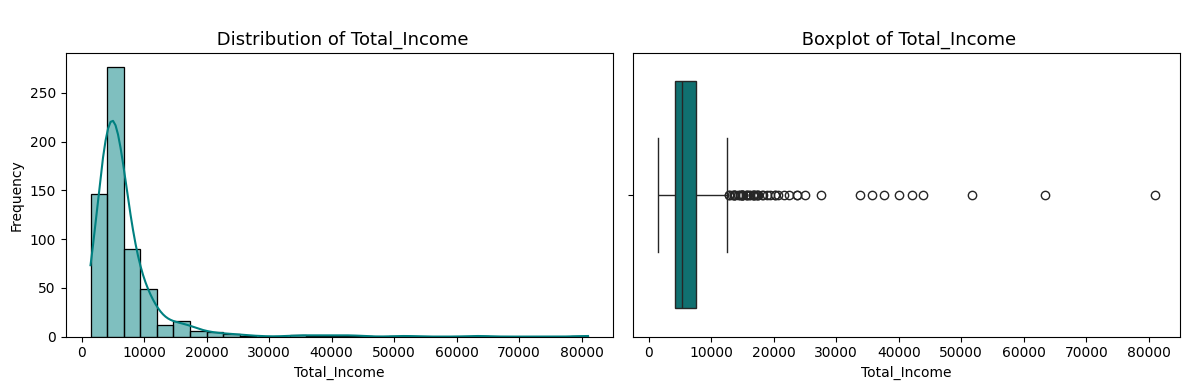


 Total_Income is highly skewed. Consider log or Box-Cox transformation.


In [ ]:
univariate_numerical_eda(loan_data, 'Total_Income')

**Univaiate Categorical Analysis for the Home Loan**

In [ ]:
cat_features = loan_data.select_dtypes(include=['object']).columns
cat_features

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
def univariate_categorical_eda(df, column):
    """
    Performs univariate EDA on a categorical column.
    Displays frequency table, proportion, and bar/pie charts.
    """
    print(f"\nFeature: {column}")
    print("="*50)

    # Frequency + proportion
    freq = df[column].value_counts(dropna=True)
    prop = df[column].value_counts(normalize=True, dropna=True) * 100
    summary = pd.DataFrame({'Count': freq, 'Percentage': prop.round(2)})
    print(summary)
    print()

    # --- Visualization ---
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f"Distribution of {column}", fontsize=14, fontweight='bold')

    # Bar Chart
    sns.barplot(
        x=freq.index, 
        y=freq.values, 
        palette='Set2', 
        ax=axes[0], 
        order=freq.index
    )
    axes[0].set_title("Bar Chart")
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("Count")
    axes[0].tick_params(axis='x', rotation=45)

    # Pie Chart
    axes[1].pie(
        freq.values, 
        labels=freq.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('Set2', len(freq))
    )
    axes[1].set_title("Pie Chart")

    plt.tight_layout()
    plt.show()


Feature: Gender
        Count  Percentage
Gender                   
Male      502       81.76
Female    112       18.24



C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_6940\2834178883.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


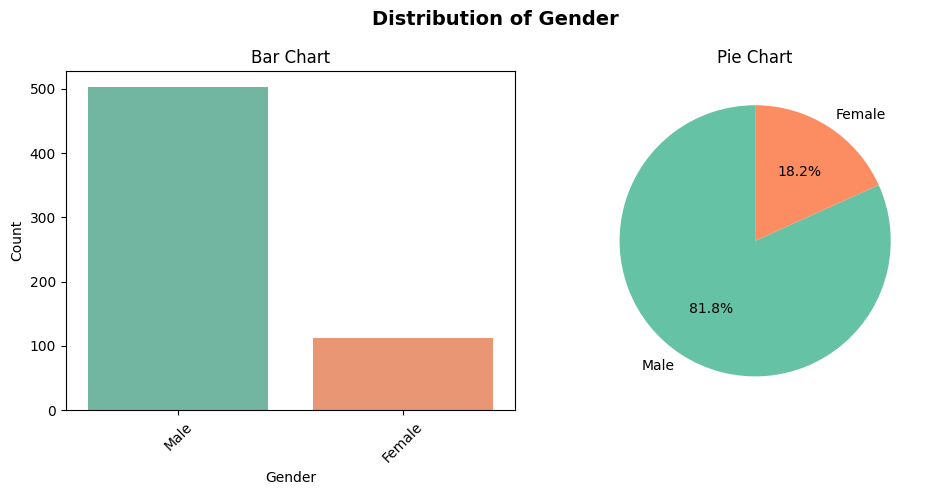


Feature: Married
         Count  Percentage
Married                   
Yes        398       65.14
No         213       34.86



C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_6940\2834178883.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


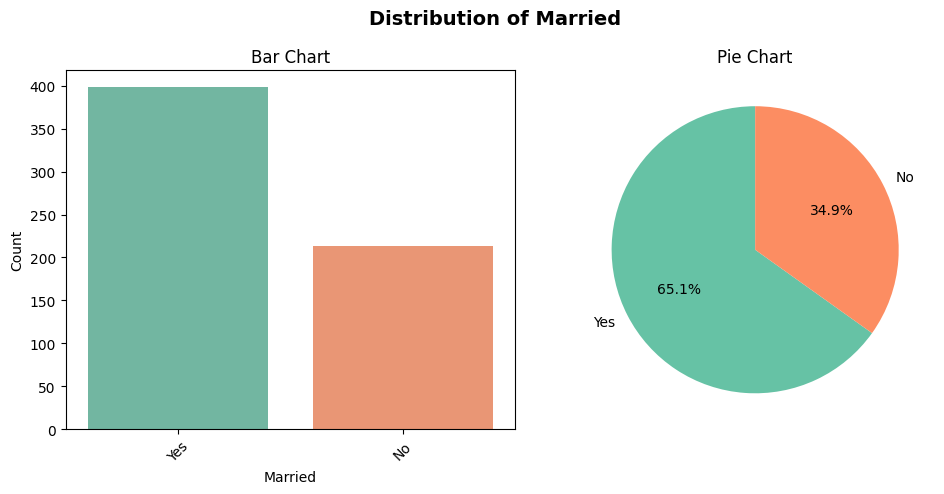


Feature: Dependents
            Count  Percentage
Dependents                   
0             360       58.63
1             102       16.61
2             101       16.45
3+             51        8.31



C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_6940\2834178883.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


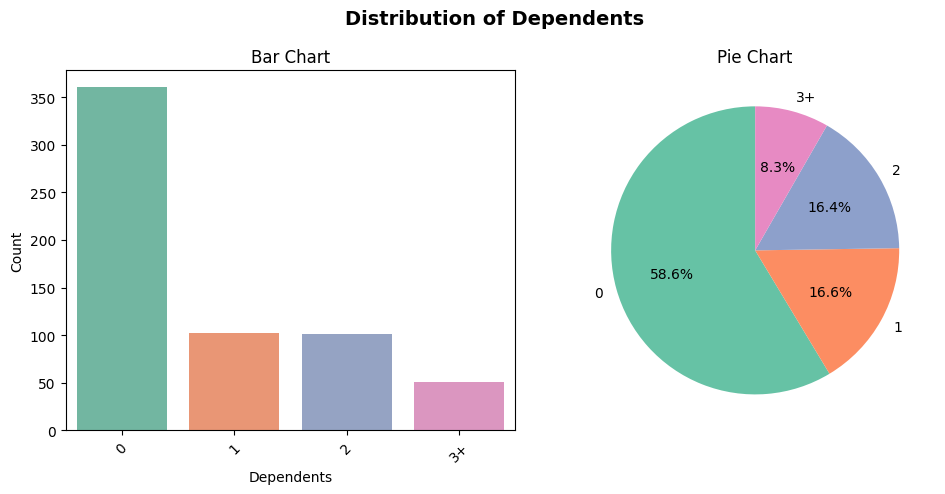


Feature: Education
              Count  Percentage
Education                      
Graduate        480       78.18
Not Graduate    134       21.82



C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_6940\2834178883.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


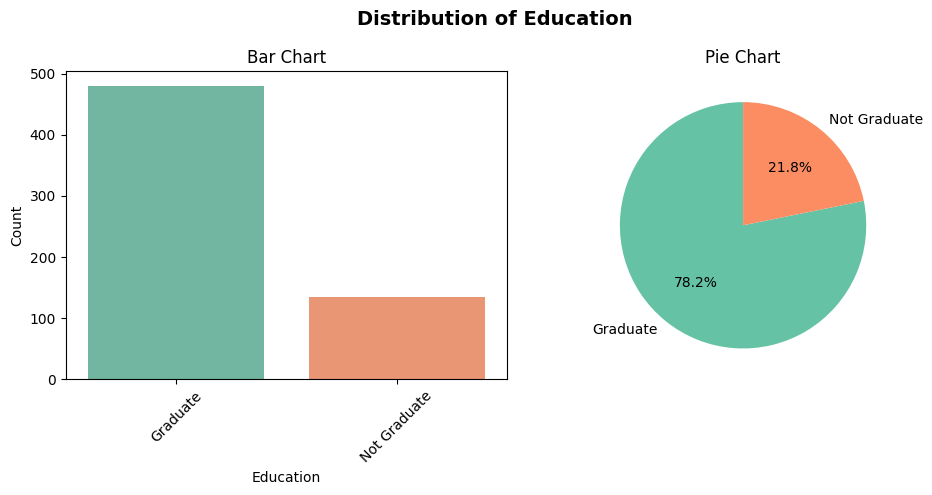


Feature: Self_Employed
               Count  Percentage
Self_Employed                   
No               532       86.64
Yes               82       13.36



C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_6940\2834178883.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


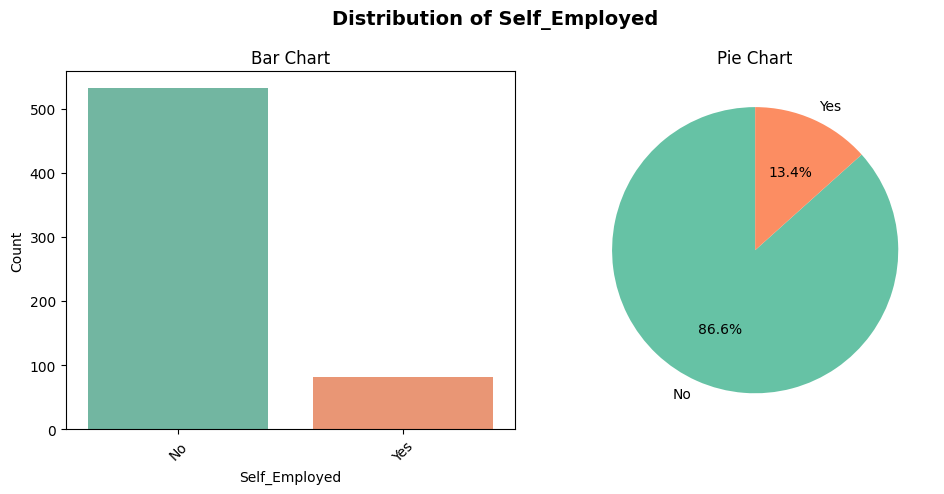


Feature: Credit_History
                Count  Percentage
Credit_History                   
1.0               475       84.22
0.0                89       15.78



C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_6940\2834178883.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


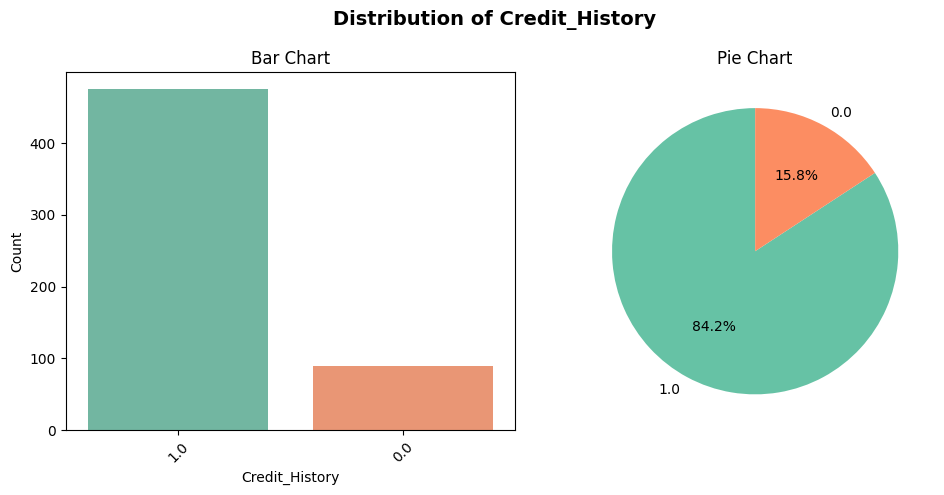


Feature: Property_Area
               Count  Percentage
Property_Area                   
Semiurban        233       37.95
Urban            202       32.90
Rural            179       29.15



C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_6940\2834178883.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


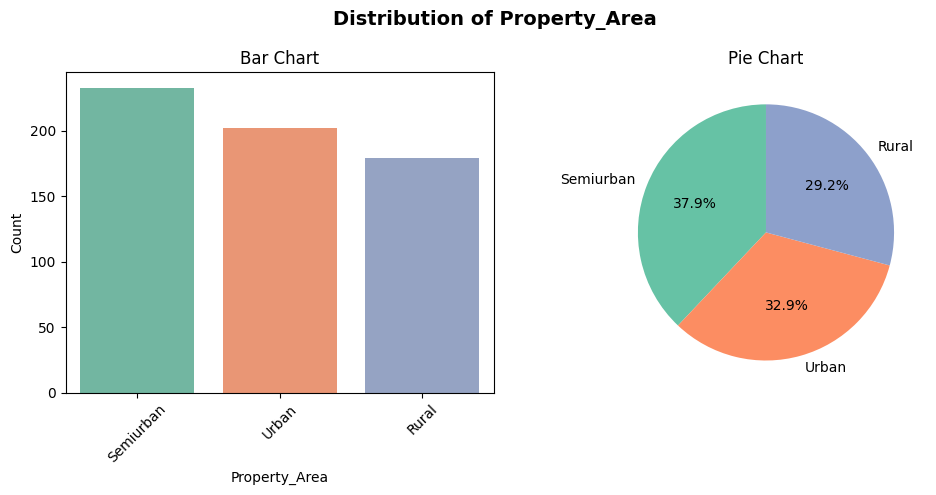


Feature: Loan_Status
             Count  Percentage
Loan_Status                   
Y              422       68.73
N              192       31.27



C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_6940\2834178883.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


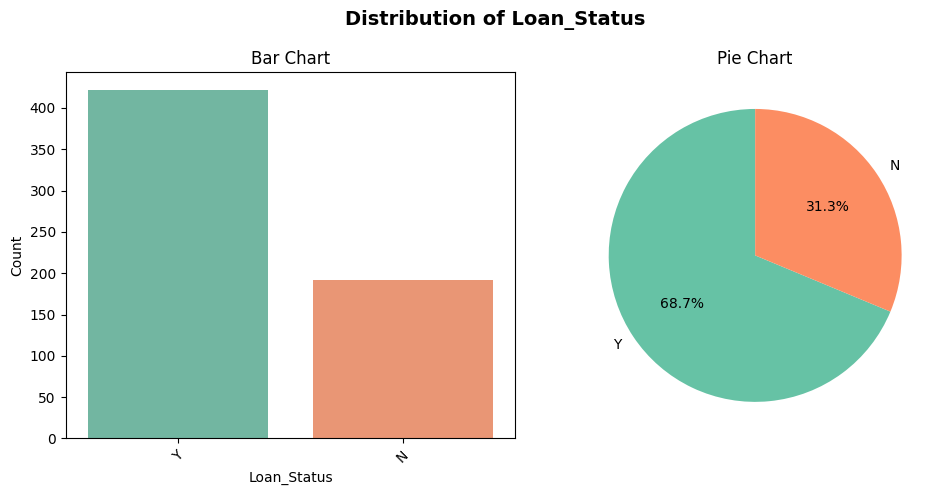

In [ ]:
for col in cat_features:
  if col != 'Loan_ID':
    univariate_categorical_eda(df, col)

**Univariate Findings**

Numerical features in our dataset such as CoapplicantIncome, ApplicantIncome, LoanAmount are highly right-skewed, We might need to apply **Log or Box-Cox Transformation** to normalize the data as it can distort algorithms sensitive to scale.

Also, this typically indicates the presence of outliers (applicants with very high incomes/loan amounts) that can negatively affect model performance. We need to decide if to **clip, transform, or leave**.

### **Bivariate analysis**

We need to explore the relationships between two variables in the dataset such the impact of credit history on loan approval.

**Our target variable is Loan Approval**

For correlation, the most likely visual to use would be **heatmap**

In [ ]:
# Correlation with target

df2 = loan_data.copy()

df2['Loan_Status'].replace({'Y': 1, 'N': 0}, inplace=True)

def correlation_with_target(df, target_col, figsize=(10,2)):
    """
    Plots a heatmap showing correlation of each numeric feature against target_col.
    Returns a Series of correlations (sorted by absolute magnitude).
    """
    # Keep only numeric columns
    numeric_df = df.select_dtypes(include='number').copy()
    if target_col not in numeric_df.columns:
        raise ValueError(f"Target column '{target_col}' must be numeric and present in the dataframe.")

    # compute correlations of every numeric column with the target
    corrs = numeric_df.corrwith(numeric_df[target_col]).drop(target_col)

    corrs_df = corrs.to_frame(name='corr').T  # shape (1, n)

    plt.figure(figsize=figsize)
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'orientation': 'vertical', 'shrink':0.7}
    )
    plt.xticks(rotation=45, ha='right')
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f'Correlation of numeric features with {target_col}', fontsize=12)
    plt.tight_layout()
    plt.show()

    # return sorted correlations for downstream use
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)

C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_6940\877600073.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Loan_Status'].replace({'Y': 1, 'N': 0}, inplace=True)
C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_6940\877600073.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True

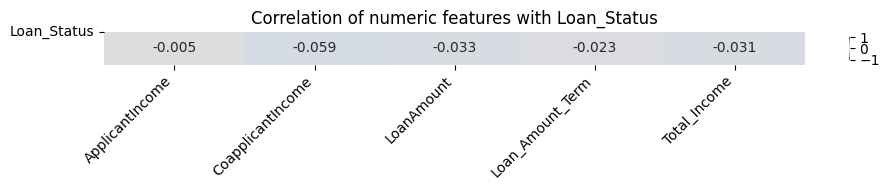

CoapplicantIncome   -0.059187
LoanAmount          -0.033214
Total_Income        -0.031271
Loan_Amount_Term    -0.022549
ApplicantIncome     -0.004710
dtype: float64


In [ ]:
corr_series = correlation_with_target(df2, 'Loan_Status')
print(corr_series)

| Feature                  | Correlation | Interpretation in Loan Context                                                                                      |
| ------------------------ | ----------- | --------------------------------------------------------------------------------------------------- |
| **CoapplicantIncome**              | -0.059       | Very slightly, as coapplicant income increases, the Loan_Status tends to decrease (move from 1 to 0), meaning higher coapplicant income is associated with a slightly higher chance of loan rejection ('N' / 0).              |
| **LoanAmount**     | -0.037       | Very slightly, as the loan amount increases, the Loan_Status tends to decrease, meaning higher loan amounts are weakly associated with a higher chance of loan rejection ('N' / 0). |
| **Total_Income**            | -0.031       | Very slightly, as total income increases, the Loan_Status_Encoded tends to decrease, meaning higher total income is weakly associated with a higher chance of loan rejection ('N' / 0).            |

**How this helps our model**

**The correlation report guides your feature selection process**:

- **Low Predictive Power**: 
The fact that all numerical features (ApplicantIncome, LoanAmount, Total_Income, etc.) have correlations very close to zero (all less than 0.06) indicates they have a weak linear relationship with the loan approval status. 

- **Prioritize Categorical Features**: 
This report suggests that you should prioritize the analysis and cleaning of your categorical features (like Credit_History, Dependents, Education, etc.), as they are likely to contain the strongest predictive signals. In loan prediction, factors like Credit_History are typically the single most important predictor.

- **Keep Features (for now)**: 
While the linear correlation is weak, it doesn't mean these features are useless. Machine learning models (especially tree-based models like Decision Trees and Random Forests) can still find non-linear relationships or interactions between these variables that Pearson correlation misses. You should typically keep them unless they prove to be redundant or computationally expensive.

**Numeric-Categorical (Feature vs Target)**

 Feature: Total_Income vs Loan_Status
                    mean          std     min      max
Loan_Status                                           
N            7323.885417  7739.774247  1442.0  81000.0
Y            6888.585118  5788.062269  1963.0  63337.0



C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_6940\877620088.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target, y=feature, data=df, palette='Set2')


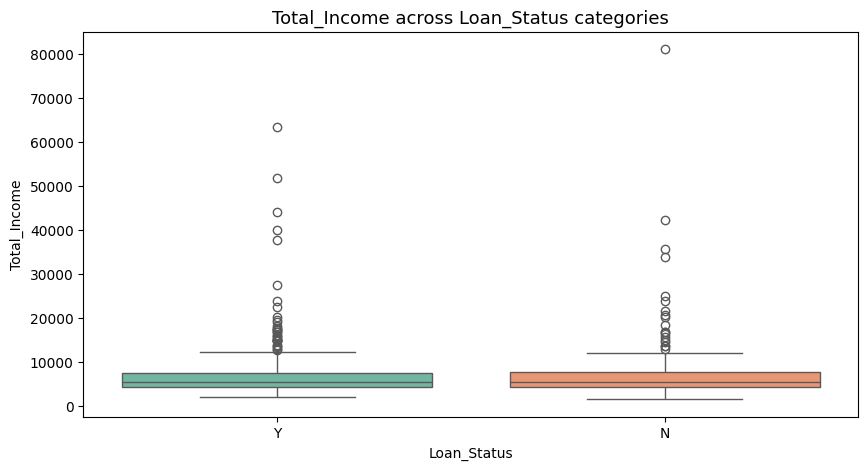

C:\Users\Perpetual's World\AppData\Local\Temp\ipykernel_6940\877620088.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=target, y=feature, data=df, palette='Set3')


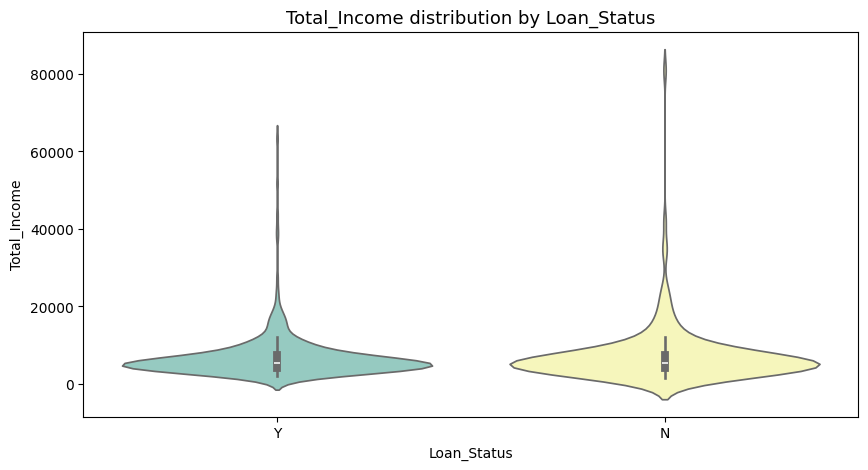

In [ ]:
# For our analysis, let us use Total_Income vs Loan_Status (target)
bivariate_num_cat(loan_data, 'Total_Income', 'Loan_Status')

**Median trend in the boxplot**

The median line within the box is almost similar for both accepted and rejected applicants meaning that income is similar for both accepted and rejected appicants.

**Distribution trend in the violin plot**

The shape and center of the violin almost overlap for both rejected and accepted applicants, this means that the distribution of income is almost similar for both status of applicants.

**Skewness**

The main body of the box (the IQR) and the violin plot's widest section would be heavily compressed towards the bottom (lower income values).

**Outliers**

The outliers plotted far above the main body indicates few applicants with very high incomes.


### **Trivariate analysis**

This would answer questions like, Does the relationship between Total_Income and LoanAmount affect the Loan_Status?

In [ ]:
def trivariate_plot(df, x_col, y_col, hue_col):
    """
    Visualizes the relationship between two numeric variables
    with a third categorical variable shown by color (hue).
    
    Parameters
    ----------
    df : pandas.DataFrame
        The dataset.
    x_col : str
        The first numeric feature (x-axis).
    y_col : str
        The second numeric feature (y-axis).
    hue_col : str
        The categorical feature (color grouping).
    """

    plt.figure(figsize=(8, 6))
    sns.lmplot(
        data=df, 
        x=x_col, 
        y=y_col, 
        hue=hue_col, 
        height=6, 
        aspect=1.2, 
        scatter_kws={'alpha':0.6}, 
        line_kws={'linewidth':2}
    )
    plt.title(f"{y_col} vs {x_col} by {hue_col}", fontsize=13)
    plt.xlabel(x_col, fontsize=11)
    plt.ylabel(y_col, fontsize=11)
    plt.grid(alpha=0.3)
    plt.show()


In [ ]:
loan_data.columns
# loan_data.dtypes

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

<Figure size 800x600 with 0 Axes>

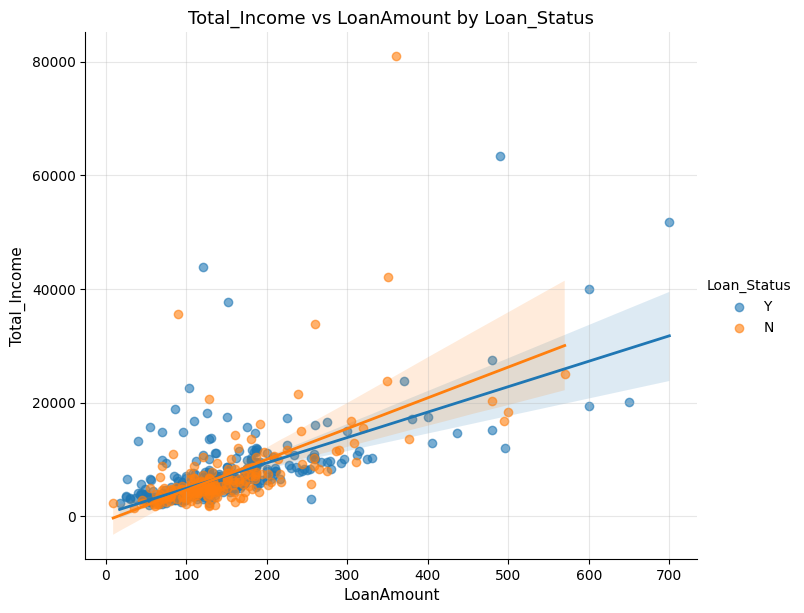

In [ ]:
trivariate_plot(loan_data, 'LoanAmount', 'Total_Income', 'Loan_Status')

**Axes**

**X-axis (Loan Amount)**: Represents the loan the applicant wants to take.

**Y-axis (Total_Income)**: Represents the total income of the applicant.

**Trend**

The upward slope of the regression lines for both the rejected and accepted applicants shows a positive correlation between Loan Amount and Total Income.

This means that as Loan Amount increases, the total income tends to increase as well.

- Both **Accepted** and **Rejected** applicants tend to cluster more and are concentrated around the lower loan amount and lower total income. This shows the weak correlation and little prediction. Which reiterates that we might need to focus more on the categorical data.

### **Multivariate analysis**

We are going to analyze the different variables and how they interact together. We are going to use **pairplots** to analyze the interactions between multiple features in the loan data.

In [ ]:
def grouped_summary(df):
    summary = df.groupby('Loan_Status').mean(numeric_only=True).round(2)
    return summary


In [ ]:
grouped_summary(loan_data)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total_Income
Loan_Status,,,,,
N,5446.08,1877.81,149.89,344.56,7323.89
Y,5384.07,1504.52,143.87,341.43,6888.59


From our analysis, as loan status goes from 0 to 1 (From No to Yes), the Applicant Income, Co-applicant Income, Loan Amount, and Total Income slightly decrease.

The lower these features, the more likely it is to get accepted for a loan.

## Comprehensive EDA Report

[EDA Report](https://docs.google.com/document/d/1grOikfSGPc8VPDltHf-P4M2gaN9ZY0WRJLsCJ7qJZP8/edit?usp=sharing)

## **BASELINE MODEL BEFORE PREPROCESSING**

In [ ]:
main_loan_data = pd.DataFrame(df)
main_loan_data = main_loan_data.set_index('Loan_ID')
main_loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## **Encoding Using LabelEncoder**

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

cat_features = loan_data.select_dtypes(include=['object'])

def encode_classes(col):
  df[col] = LabelEncoder().fit_transform(df[col])

for col in cat_features:
  encode_classes(col)

In [ ]:
df['LoanAmount']

0      128.0
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64

In [ ]:
# split the data

y = df['Loan_Status']
X = df.drop(columns=['Loan_Status', 'Loan_ID'])

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=234)

In [ ]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=234, max_iter=5000)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())
model.fit(X_train, y_train)

c:\Users\Perpetual's World\Desktop\Work\ai_engineering\module_three\b_venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1262: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,234
,solver,'lbfgs'
,max_iter,5000
,multi_class,'multinomial'


              precision    recall  f1-score   support

           0       0.94      0.45      0.61        38
           1       0.80      0.99      0.88        85

    accuracy                           0.82       123
   macro avg       0.87      0.72      0.75       123
weighted avg       0.84      0.82      0.80       123



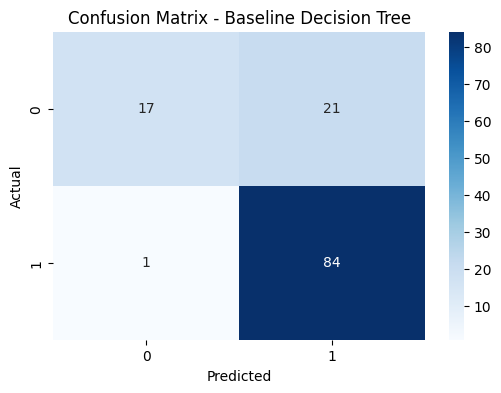

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Baseline Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**A tree based algorithm**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.55      0.58        38
           1       0.81      0.85      0.83        85

    accuracy                           0.76       123
   macro avg       0.71      0.70      0.71       123
weighted avg       0.75      0.76      0.75       123



Baseline Decision Tree Accuracy: 0.756

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.55      0.58        38
           1       0.81      0.85      0.83        85

    accuracy                           0.76       123
   macro avg       0.71      0.70      0.71       123
weighted avg       0.75      0.76      0.75       123



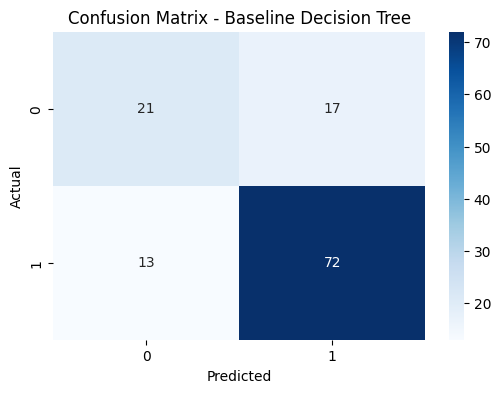

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Decision Tree Accuracy: {accuracy:.3f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix 
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Baseline Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
df.to_csv("home_loan_eda.csv", index=False)